# 0.0. BUSINESS

|Description | Feature Type | Feature | Data Type |
|---|---|---|---|
|Age | Objective Feature | age | int (days)|
|Height | Objective Feature | height | int (cm) |
|Weight | Objective Feature | weight | float (kg) |
|Gender | Objective Feature | gender | categorical code |
|Systolic blood pressure | Examination Feature | ap_hi | int |
|Diastolic blood pressure | Examination Feature | ap_lo | int |
|Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
|Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
|Smoking | Subjective Feature | smoke | binary |
|Alcohol intake | Subjective Feature | alco | binary |
|Physical activity | Subjective Feature | active | binary |
|Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

for binary data:
1: Positive/ 0: Negative

## 1.0. IMPORTS

In [282]:
import pandas as pd
import numpy as np
import math
import statistics

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

import seaborn as sns

## 1.1. Helper Functions

In [283]:
def jupyter_settings():
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    sns.set()
    
    
def stats_num_describe(num_attributes): # Statistical description of numeric values
    stats = num_attributes.describe().T

    stats['range'] = df2.apply(lambda x: x.max() - x.min()) # add range to describe
    stats['skew'] = df2.apply( lambda x: x.skew()) # add skew to describe
    stats['kurtosis'] = df2.apply( lambda x: x.kurtosis()) # add kurtosis to describe
    
    return stats


def stats_cat_describe(cat_attributes): # Satistical description of categorical values
    values = pd.DataFrame(cat_attributes.apply(lambda x: x.value_counts())).T # creating counter of each catgorical value
    count = pd.DataFrame(cat_attributes.apply(lambda x: len(x))) # creating a count of all values
    mode = pd.DataFrame(cat_attributes.apply(lambda x: statistics.mode(x))) # creating a mode of the values

    stats = pd.concat([count, mode, values], axis=1) # concat

    list_columns = ['count', 'value_mode', 'value_0', 'value_1', 'value_2', 'value_3'] # rename columns
    stats.columns = list_columns # rename columns
    
    return stats 

In [284]:
jupyter_settings()

## 1.2. Import Data

In [285]:
df1 = pd.read_csv('data/cardio_train.csv', sep=';', index_col= 'id')

In [286]:
df1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# 2.0. DATA DESCRIPTION

In [287]:
df2 = df1.copy()

## 2.1. Data Dimension

In [288]:
print('Number of rows: {}'.format(df2.shape[0]))
print('Number of columns: {}'.format(df2.shape[1]))

Number of rows: 70000
Number of columns: 12


## 2.2. Changings

In [289]:
# Changing the name of columns ap_hi, ap_lo, gluc and alco
df2.rename({'ap_hi': 'p_systolic', 'ap_lo': 'p_diastolic', 'gluc': 'glucose', 'alco': 'alcohol'}, axis=1, inplace=True)

In [290]:
# Changing Age Scale of days to years (rounding)
df2['age'] = round(df2['age']/365).astype(int) #rounding age

## 2.2. Data Types

In [291]:
df2.dtypes

age              int64
gender           int64
height           int64
weight         float64
p_systolic       int64
p_diastolic      int64
cholesterol      int64
glucose          int64
smoke            int64
alcohol          int64
active           int64
cardio           int64
dtype: object

All dtypes ok

## 2.3. Check NA

In [292]:
df2.isna().sum()

age            0
gender         0
height         0
weight         0
p_systolic     0
p_diastolic    0
cholesterol    0
glucose        0
smoke          0
alcohol        0
active         0
cardio         0
dtype: int64

The data no have missing Data

## 2.4. Statistical Description - With Outliers

In [293]:
num_attributes = df2[['age', 'height', 'weight', 'p_systolic', 'p_diastolic']]
cat_attributes = df2[['gender', 'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'cardio']]

In [294]:
num_stats = stats_num_describe(num_attributes)
num_stats

,count,mean,std,min,25%,50%,75%,max,range,skew,kurtosis
age,70000.0,53.338686,6.765294,30.0,48.0,54.0,58.0,65.0,35.0,-0.306444,-0.821815
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0,195.0,-0.642187,7.943653
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0,190.0,1.012070,2.586825
p_systolic,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0,16170.0,85.296214,7580.074738
p_diastolic,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0,11070.0,32.114083,1425.914585


Num Attributes - values out of reality:
* Min height = 55?
* Max height = 250?
* Min weight = 10?
* Max p_systolic = 16020?
* Min p_systolic = -150?
* Max p_diastolic = 11000?
* Min p_diastolic = -70?

In [295]:
cat_stats = stats_cat_describe(cat_attributes)
cat_stats

,count,value_mode,value_0,value_1,value_2,value_3
gender,70000,1,NaN,45530.0,24470.0,NaN
cholesterol,70000,1,NaN,52385.0,9549.0,8066.0
glucose,70000,1,NaN,59479.0,5190.0,5331.0
smoke,70000,0,63831.0,6169.0,NaN,NaN
alcohol,70000,0,66236.0,3764.0,NaN,NaN
active,70000,1,13739.0,56261.0,NaN,NaN
cardio,70000,0,35021.0,34979.0,NaN,NaN


In [296]:
print(df2['cardio'].value_counts(normalize=True)) # checking the proportion between the values of the response variable

0    0.5003
1    0.4997
Name: cardio, dtype: float64


* 50% to the each response
* The values of the response variable are balanced

## 2.5. Treatment of Outliers

### 2.5.1. Height and Weight

Text(0.5, 1.0, 'Density weight')

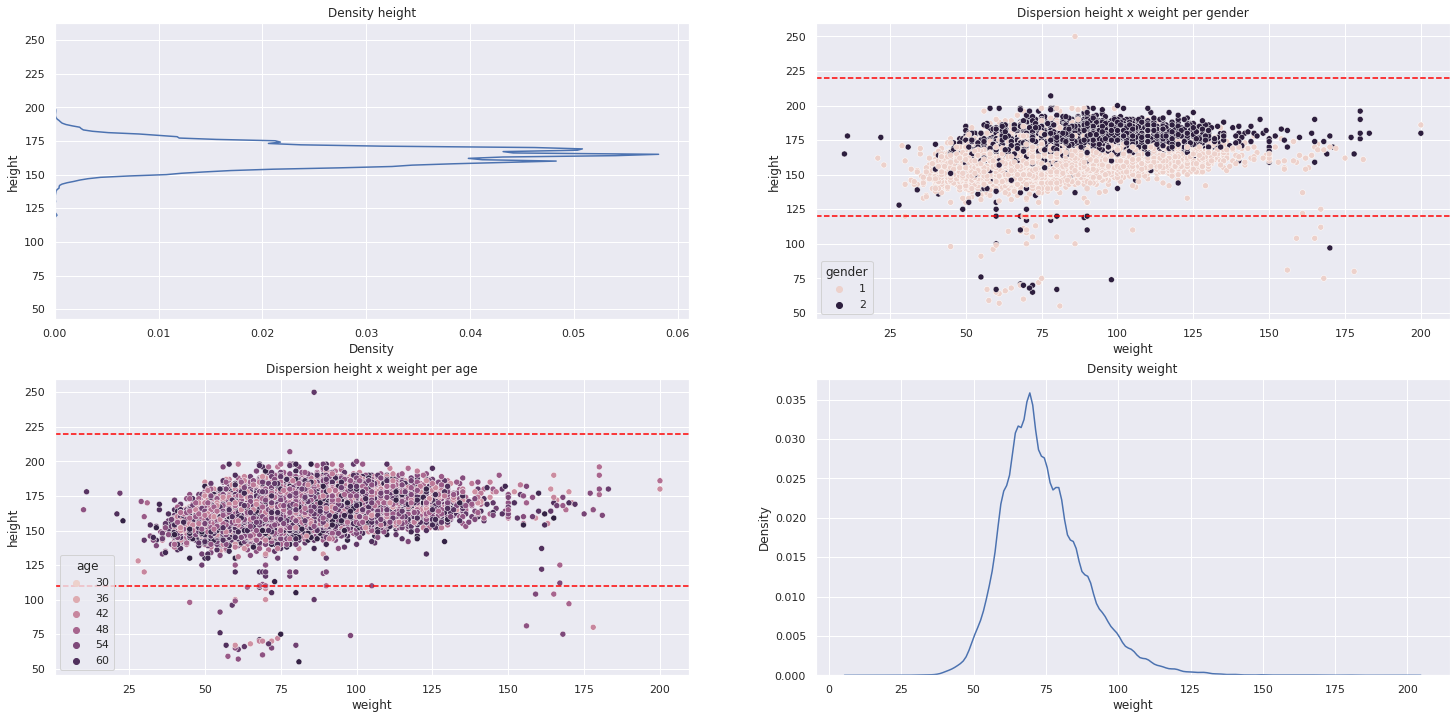

In [297]:
plt.subplot(2, 2, 1)
sns.kdeplot(y='height', data=df2)
plt.title('Density height')

plt.subplot(2, 2, 2)
sns.scatterplot(x='weight', y='height', hue='gender', data=df2)
plt.axhline(y=220, color='red', linestyle='--')
plt.axhline(y=120, color='red', linestyle='--')
plt.title('Dispersion height x weight per gender')


plt.subplot(2, 2, 3)
sns.scatterplot(x='weight', y='height', hue='age', data=df2)
plt.axhline(y=220, color='red', linestyle='--')
plt.axhline(y=110, color='red', linestyle='--')
plt.title('Dispersion height x weight per age')

plt.subplot(2, 2, 4)
sns.kdeplot(x='weight', data=df2)
plt.title('Density weight')

It's possible to identify some **outliers** in the dataset:


<dl>
  <dt>The tallest man in the world measures 2,465 meters.</dt>
  <dd>In the dataset the tallest person is a woman who measures 2.50 meters, clearly a mistake. </dd>
  <dd>For this analysis, only values below 2.10 meters will be considered.</dd>
&nbsp;
  <dt>The dataset has some height values below the average.</dt>
  <dd>The average height in cases of dwarfism is 1.22 meters.</dd>
   <dd>For this analysis, only values greater than 1.10 meters will be considered.</dd>
</dl>

>**height** > 220 -> Exclude

>**height** < 110 -> Exclude

In [298]:
out_h_tall = df2[df2['height'] >= 220]
out_h_short = df2[df2['height'] <= 120]

df2 = df2.drop(out_h_tall.index, axis=0).copy()
df2 = df2.drop(out_h_short.index, axis=0).copy()

### 2.5.2. BMI

For a more accurate analysis of outliers, the BMI (Body Mass Index) feature was created, represented by the formula:

> **BMI** = Weight(Kg) / [Height(m)]²

In [299]:
df2['bmi'] = df2['weight'] / (df2['height']/100)**2

Text(0.5, 1.0, 'Dispersion height x bmi per weight')

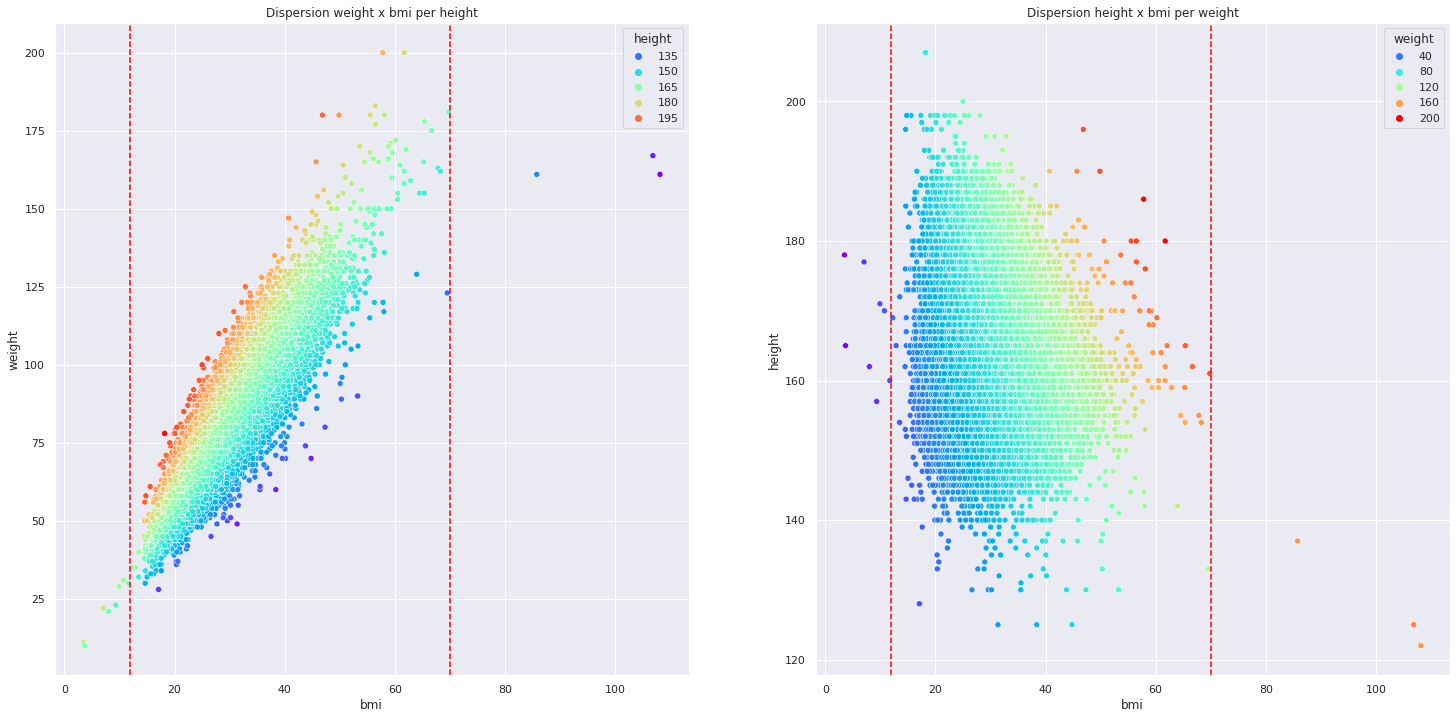

In [300]:
plt.subplot(1, 2, 1)
sns.scatterplot(x='bmi', y='weight', hue='height', palette='rainbow', data=df2)
plt.axvline(x=12, color='red', linestyle='--')
plt.axvline(x=70, color='red', linestyle='--')
plt.title('Dispersion weight x bmi per height')

plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='height', hue='weight', palette='rainbow', data=df2)
plt.axvline(x=12, color='red', linestyle='--')
plt.axvline(x=70, color='red', linestyle='--')
plt.title('Dispersion height x bmi per weight')

It's possible to identify some **outliers** in the dataset:


<dl>
  <dt>BMI's higher than 70 and lowest than 12 will be excluded</dt>
</dl>

>**BMI** > 70 --> Exclude

>**BMI** < 12 --> Exclude

In [301]:
drop_bmi = df2[(df2['bmi'] < 12) | (df2['bmi'] > 70)]

df2 = df2.drop(drop_bmi.index, axis=0).copy()

### 2.5.3. p_diastolic x p_systolic

In [302]:
# pre filtering -> filtering values without sense
df2 = df2.drop(df2[(df2['p_systolic'] > 250) | (df2['p_systolic'] < 0)].index).copy()
df2 = df2.drop(df2[(df2['p_diastolic'] > 150) | (df2['p_diastolic'] < 0)].index).copy()

Filtering out some values that don't make sense, like negative values and very high outliers, in order to have a better view of the data.

In [303]:
pressure_input_error = df2.loc[df2['p_diastolic'] > df2['p_systolic'], ['p_systolic', 'p_diastolic']] # some diastolic pressures are bigger than systolic
pressure_input_error

,p_systolic,p_diastolic
id,,
681,120,150
815,14,90
913,70,110
1294,14,90
1360,11,80
...,...,...
98039,12,80
98213,14,90
98568,14,90


In [304]:
df2 = df2.drop(pressure_input_error.index).copy()

Filtering values where diastolic pressure is higher than systolic pressure.

In [305]:
df2['dif_pres'] = df2['p_systolic'] - df2['p_diastolic']

Text(0.5, 1.0, 'Boxplot pressure difference')

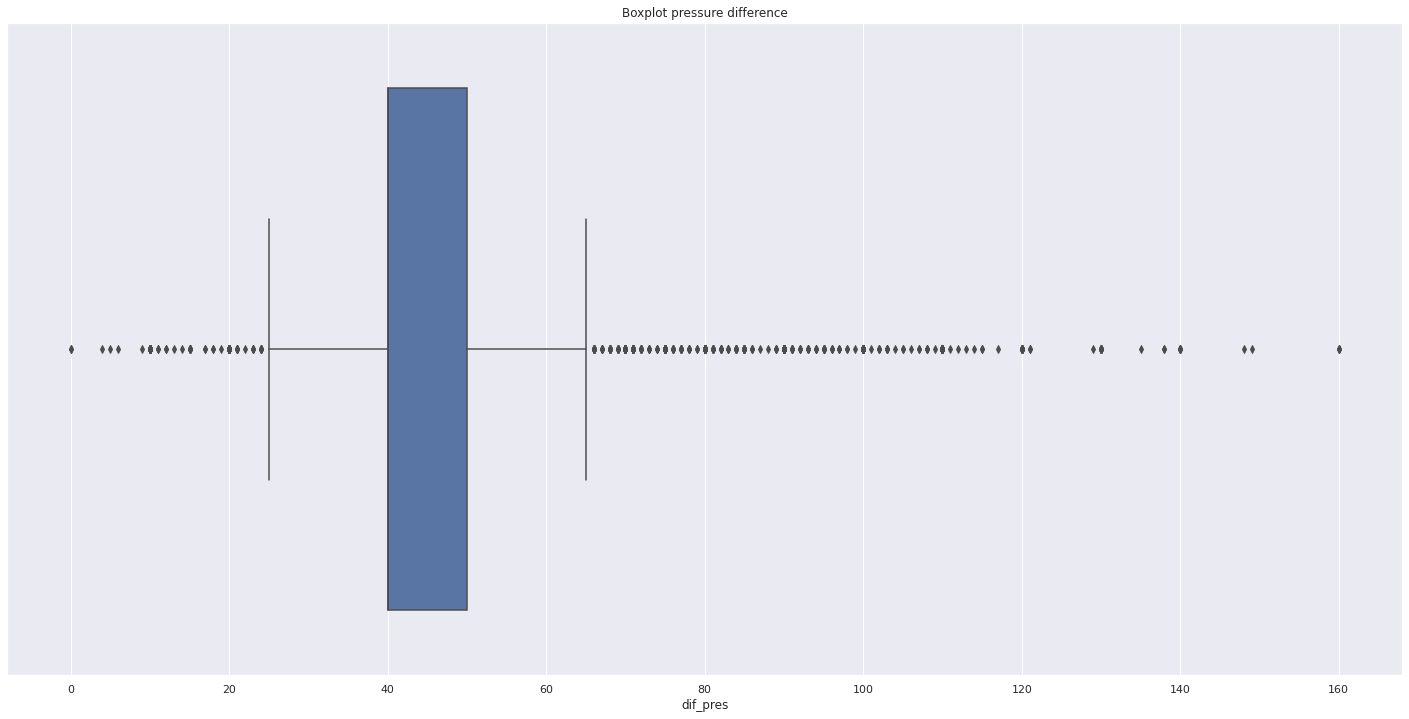

In [306]:
sns.boxplot(x='dif_pres', data=df2)
plt.title('Boxplot pressure difference')

To better understand the existing outliers, we will use the outlier detection method using the **IQR** (Inter Quartil Range) formula:

> **IQR** = Q3 - Q1

> **Lower Outlier** = Q1 - (1.5 * IQR)

> **High Outlier** = Q3 + (1.5 * IQR)

In [307]:
high_outlier = df2['dif_pres'].quantile([0.75]) + (df2['dif_pres'].quantile([0.75]).values - df2['dif_pres'].quantile([0.25]).values) * 1.5
low_outlier = df2['dif_pres'].quantile([0.25]) - (df2['dif_pres'].quantile([0.75]).values - df2['dif_pres'].quantile([0.25]).values) * 1.5

print('High Outlier: {}'.format(high_outlier.values[0]))
print('Low Outlier: {}'.format(low_outlier.values[0]))

High Outlier: 65.0
Low Outlier: 25.0


Larger differences are still possible, but smaller differences(or null) are not possible.

>**Diference** > 100 --> Exclude

>**Diference** < 5 --> Exclude

In [308]:
dif_drop = df2[(df2['dif_pres']>=100) | (df2['dif_pres']<=10)]
df2 = df2.drop(dif_drop.index).copy() # exclude outliers of dif_press

Text(0.5, 1.0, 'Boxplot diastolic pressure')

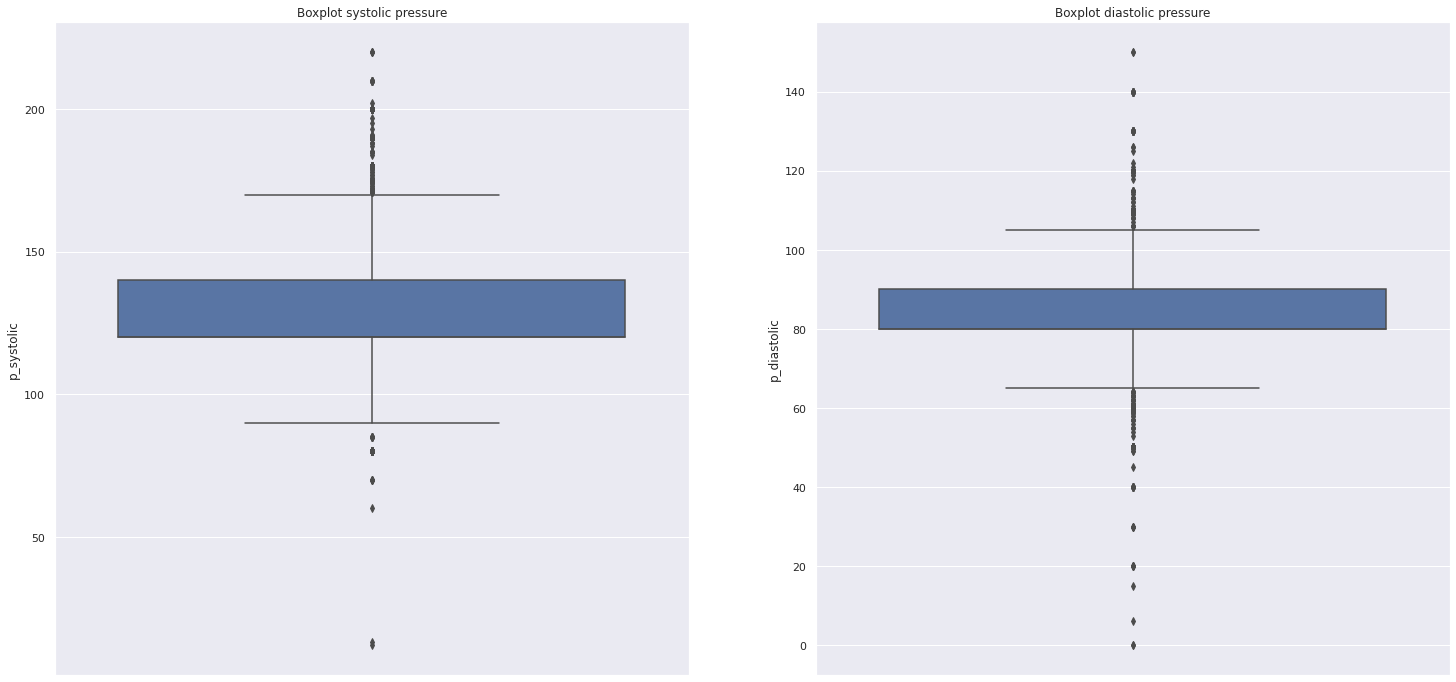

In [309]:
plt.subplot(1, 2, 1)
sns.boxplot(y='p_systolic', data=df2)
plt.title('Boxplot systolic pressure')

plt.subplot(1, 2, 2)
sns.boxplot(y='p_diastolic', data=df2)
plt.title('Boxplot diastolic pressure')

Text(0.5, 1.0, 'disperion p_systolic x p_diastolic per age')

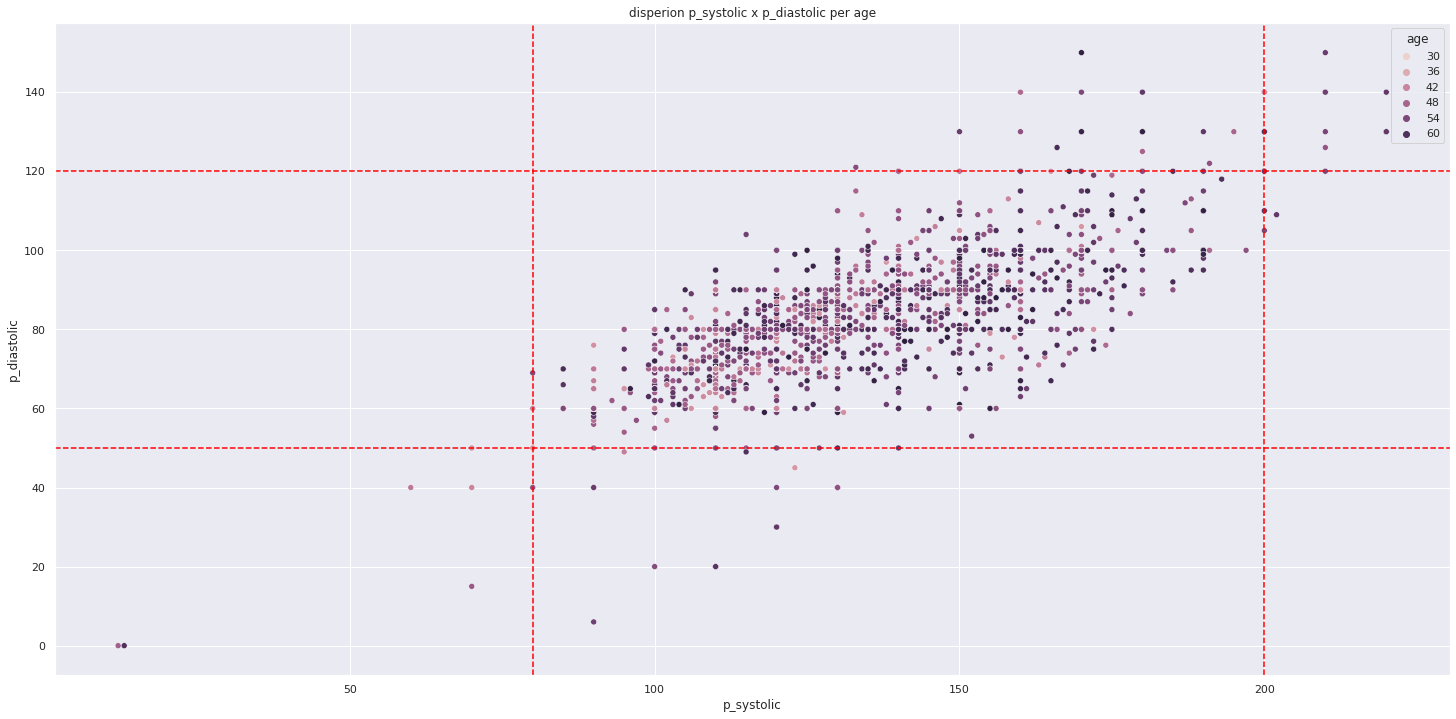

In [310]:
sns.scatterplot(x='p_systolic', y='p_diastolic', hue='age', data=df2)
plt.axvline(x=200, color='red', linestyle='--')
plt.axvline(x=80, color='red', linestyle='--')
plt.axhline(y=120, color='red', linestyle='--')
plt.axhline(y=50, color='red', linestyle='--')

plt.title('disperion p_systolic x p_diastolic per age')

Using the IQR formula again to identify outliers

In [311]:
high_outlier_hi = df2['p_systolic'].quantile([0.75]) + (df2['p_systolic'].quantile([0.75]).values - df2['p_systolic'].quantile([0.25]).values) * 1.5
low_outlier_hi = df2['p_systolic'].quantile([0.25]) - (df2['p_systolic'].quantile([0.75]).values - df2['p_systolic'].quantile([0.25]).values) * 1.5

high_outlier_lo = df2['p_diastolic'].quantile([0.75]) + (df2['p_diastolic'].quantile([0.75]).values - df2['p_diastolic'].quantile([0.25]).values) * 1.5
low_outlier_lo = df2['p_diastolic'].quantile([0.25]) - (df2['p_diastolic'].quantile([0.75]).values - df2['p_diastolic'].quantile([0.25]).values) * 1.5

print('High Outlier from systolic: {}'.format(high_outlier_hi.values[0]))
print('Low Outlier from systolic: {}'.format(low_outlier_hi.values[0]))

print()

print('High Outlier from diastolic: {}'.format(high_outlier_lo.values[0]))
print('Low Outlier from diastolic: {}'.format(low_outlier_lo.values[0]))

High Outlier from systolic: 170.0
Low Outlier from systolic: 90.0

High Outlier from diastolic: 105.0
Low Outlier from diastolic: 65.0


It's possible to identify some **outliers** in the dataset:

<dl>
  <dt>p_systolic higher than 200 and lowest than 80 will be excluded</dt>
  <dt>p_diastolic higher than 120 and lowest than 50 will be excluded</dt>
</dl>

> 80 >= **p_systolic** >= 200 --> Exclude

> 50 >= **p_diastolic** >= 120 --> Exclude

In [312]:
pressure_drop = df2[(df2['p_systolic'] >= 200) | (df2['p_systolic'] <= 80) | (df2['p_diastolic'] >= 120) | (df2['p_diastolic'] <= 50)]

df2 = df2.drop(pressure_drop.index, axis=0).copy()

### 2.5.4. Plotting Data after drop outliers

Text(0.5, 1.0, 'Dispersion Systolic x Diastolic')

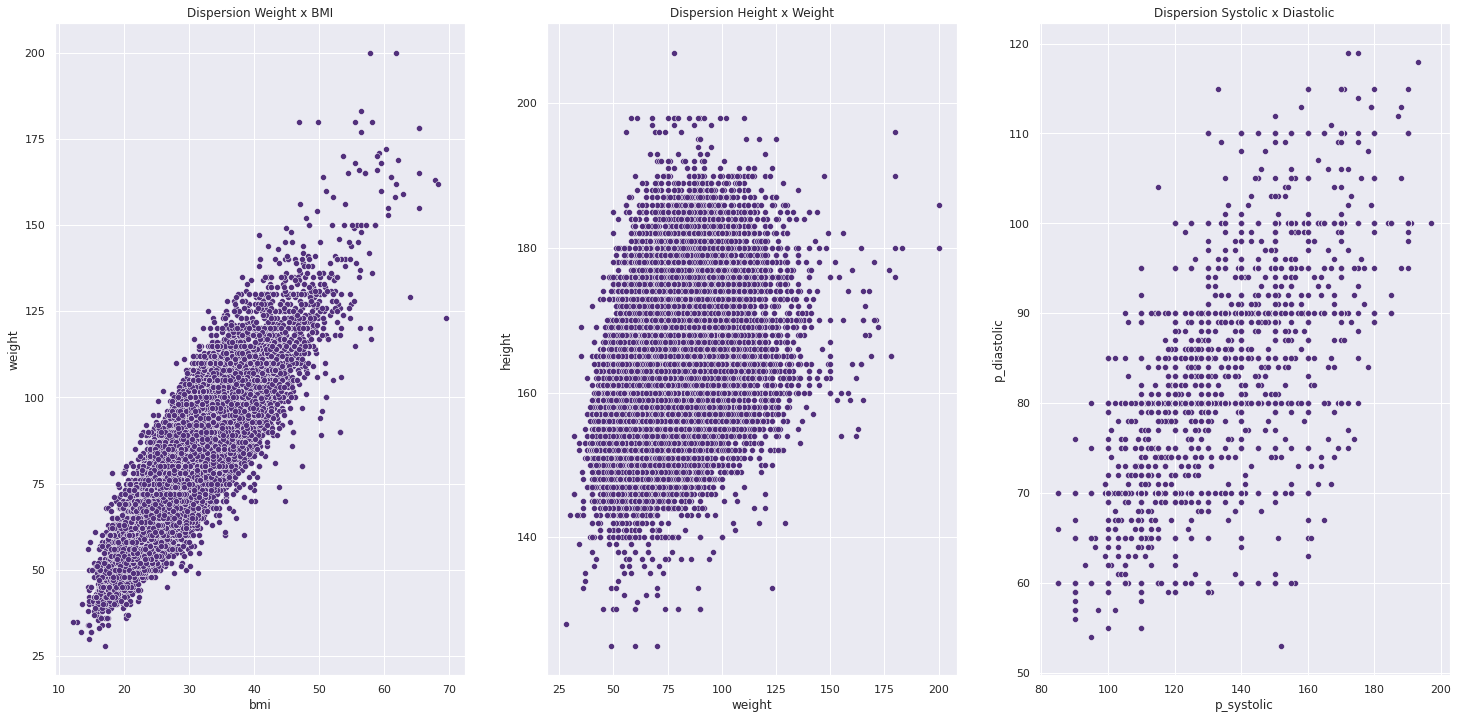

In [328]:
plt.subplot(1, 3, 1)
sns.scatterplot(x='bmi', y='weight', color='#52307c', data=df2)
plt.title('Dispersion Weight x BMI')

plt.subplot(1, 3, 2)
sns.scatterplot(x='weight', y='height', color='#52307c', data=df2)
plt.title('Dispersion Height x Weight')

plt.subplot(1, 3, 3)
sns.scatterplot(x='p_systolic', y='p_diastolic', color='#52307c', data=df2)
plt.title('Dispersion Systolic x Diastolic')

## 2.6. Statistical Description - Without Outliers

In [330]:
percentage = ((70000 - df2.shape[0]) / 70000) * 100
print('Data Percentage Drop: {:.2f}%'.format(percentage))

Data Percentage Drop: 2.92%


In [333]:
num_attributes = df2[['age', 'height', 'weight', 'p_systolic', 'p_diastolic', 'dif_pres', 'bmi']]
cat_attributes = df2[['gender', 'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'cardio']]

In [334]:
num_stats = stats_num_describe(num_attributes)
num_stats

,count,mean,std,min,25%,50%,75%,max,range,skew,kurtosis
age,67957.0,53.325471,6.767722,30.000000,48.000000,54.000000,58.000000,65.000000,35.000000,-0.304425,-0.824318
height,67957.0,164.442662,7.843210,125.000000,159.000000,165.000000,170.000000,207.000000,82.000000,0.105603,0.225326
weight,67957.0,74.073434,14.220633,28.000000,65.000000,72.000000,82.000000,200.000000,172.000000,0.978813,2.336639
p_systolic,67957.0,126.398620,15.926533,85.000000,120.000000,120.000000,140.000000,197.000000,112.000000,0.758240,0.877131
p_diastolic,67957.0,81.202937,9.022704,53.000000,80.000000,80.000000,90.000000,119.000000,66.000000,0.125740,0.552320
dif_pres,67957.0,45.195683,11.060335,11.000000,40.000000,40.000000,50.000000,99.000000,88.000000,1.088832,1.940516
bmi,67957.0,27.426358,5.179107,12.254473,23.875115,26.303619,30.116002,69.534739,57.280266,1.198885,2.613325


In [336]:
cat_stats = stats_cat_describe(cat_attributes)
cat_stats

,count,value_mode,value_0,value_1,value_2,value_3
gender,67957,1,NaN,44273.0,23684.0,NaN
cholesterol,67957,1,NaN,51051.0,9146.0,7760.0
glucose,67957,1,NaN,57829.0,4979.0,5149.0
smoke,67957,0,61994.0,5963.0,NaN,NaN
alcohol,67957,0,64348.0,3609.0,NaN,NaN
active,67957,1,13344.0,54613.0,NaN,NaN
cardio,67957,0,34443.0,33514.0,NaN,NaN


In [337]:
print(df2['cardio'].value_counts(normalize=True)) # checking the proportion between the values of the response variable

0    0.506835
1    0.493165
Name: cardio, dtype: float64
